## Финальное соревнование

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

В данном задании вас ждет неизвестная зависимость. Ваша основная задача: **построить две лучших модели**, минимизирующих среднеквадратичную ошибку (MSE):
1. На первую модель не налагается ограничений.
2. Вторая модель должна быть **линейной**, т.е. представлять собой линейную комбинацию признаков плюс свободный член: $\boldsymbol{w}^{\top}\boldsymbol{x} + b$. При этом __вы можете использовать базовые математические операции для преобразования признаков__: np.exp, np.log, np.pow (полный список доступен в [документации](https://numpy.org/doc/stable/reference/routines.math.html)), а также линейные операции над ними (сумма, умножение на число и пр.). Для преобразования признаков вам будет необходимо написать функцию `my_transformation`. __Кол-во параметров (весов) используемых второй моделью не должно превышать 15 (включая свободный член).__

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в будущем писать код более уверенно

In [207]:
import os
import json

from itertools import combinations_with_replacement

import numpy as np
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Загрузка данных происходит ниже. Если она не срабатывает, самостоятельно скачайте файл `hw_final_open_data.npy` и положите его в ту же директорию, что и ноутбук.

In [ ]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_data.npy -O hw_final_open_data.npy
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_open_target.npy -O hw_final_open_target.npy

In [72]:
assert os.path.exists('hw_final_open_data.npy'), 'Please, download `hw_final_open_data.npy` and place it in the working directory'
assert os.path.exists('hw_final_open_target.npy'), 'Please, download `hw_final_open_target.npy` and place it in the working directory'
data = np.load('hw_final_open_data.npy', allow_pickle=False)
target = np.load('hw_final_open_target.npy', allow_pickle=False)

Разбивка на `train` и `val` опциональна и сделана для вашего удобства.

In [73]:
train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.3)

### Модель №1
Напоминаем, в первой части задания ваша основная задача – получить наилучший результат без ограничений на модель. Сдаваться будут только предсказания модели.

Пример с использованием Random Forest доступен ниже.

In [74]:
for col in range(train_x.shape[1]):
    print(np.round(np.corrcoef(train_x[:, col], train_y)[0, 1], 4))

0.9387
0.9899
0.206
0.9886
0.9667
0.9903
0.2119


Все признаки, кроме 2 и 6, скоррелированы с таргетом.

In [75]:
np.corrcoef(train_x.T)

array([[1.        , 0.93649986, 0.32502473, 0.9650185 , 0.99429927,
        0.9422111 , 0.33483852],
       [0.93649986, 1.        , 0.18841686, 0.99547462, 0.96810409,
        0.99985288, 0.19440077],
       [0.32502473, 0.18841686, 1.        , 0.22008278, 0.2812641 ,
        0.19389303, 0.99936453],
       [0.9650185 , 0.99547462, 0.22008278, 1.        , 0.98736316,
        0.99695601, 0.22699898],
       [0.99429927, 0.96810409, 0.2812641 , 0.98736316, 1.        ,
        0.97219716, 0.28990019],
       [0.9422111 , 0.99985288, 0.19389303, 0.99695601, 0.97219716,
        1.        , 0.20003996],
       [0.33483852, 0.19440077, 0.99936453, 0.22699898, 0.28990019,
        0.20003996, 1.        ]])

Признаки 0, 1, 3, 4, 5 скоррелированы между собой, также признаки 2 и 6 скоррелированы между собой.

Оставим только 5-ый признак, который имеет наибольшую корреляцию с таргетом.

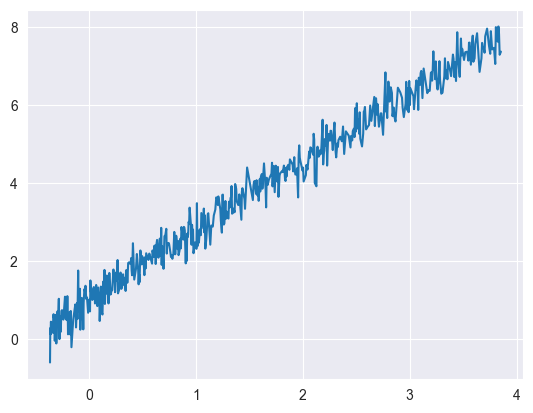

In [76]:
sns.lineplot(x=train_x[:, 5], y=train_y);

То есть мы имеем линейную зависимость с шумом.

In [77]:
reg = Ridge(
    max_iter=100,
    random_state=0
)
reg.fit(train_x[:, [5]], train_y);

In [78]:
print(
    f'train mse =\t {mean_squared_error(np.round(reg.predict(train_x[:, [5]]), 2), np.round(train_y)):.5f}',
    f'validation mse = {mean_squared_error(np.round(reg.predict(valid_x[:, [5]])), np.round(valid_y)):.5f}',
    sep='\n'
)

train mse =	 0.19049
validation mse = 0.22500


##### Сдача первой части соревнования
Загрузите файл `hw_final_closed_data.npy` (ссылка есть на странице с заданием). Если вы используете sklearn-совместимую модель, для генерации посылки вы можете воспользоваться функцией `get_predictions`. В ином случае перепишите функцию для вашей модели и запустите код под следующей ячейкой для генерации посылки.

In [79]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_yandex_ml_trainings/homeworks/assignment_final/hw_final_closed_data.npy -O hw_final_closed_data.npy

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [80]:
assert os.path.exists('hw_final_closed_data.npy'), 'Please, download `hw_final_closed_data.npy` and place it in the working directory'
closed_data = np.load('hw_final_closed_data.npy', allow_pickle=False)

Если необходимо, преобразуйте данные. Преобразованную матрицу объект-признак сохраните в переменную `closed_data`.

In [81]:
closed_data = closed_data[:, [5]]

In [82]:
def get_predictions(model, eval_data, step=10):
    predicted_values = model.predict(eval_data)
    return predicted_values

Обращаем ваше внимание, предсказания округляются до сотых!

In [83]:
predicted_values = np.round(get_predictions(model=reg, eval_data=closed_data), 2)

assert predicted_values.shape == (closed_data.shape[0], ) # predictions should be just one-dimensional array

In [84]:
# do not change the code in the block below
# __________start of block__________
def float_list_to_comma_separated_str(_list):
    _list = list(np.round(np.array(_list), 2))
    return ','.join([str(x) for x in _list])

submission_dict = {
    'predictions': float_list_to_comma_separated_str(predicted_values)
}
with open('submission_dict_final_p01.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
    
print('File saved to `submission_dict_final_p01.json`')
# __________end of block__________

File saved to `submission_dict_final_p01.json`


### Модель №2
Функция `my_transformation` принимает на вход матрицу объект-признак (`numpy.ndarray` типа `np.float`) и преобразует ее в новую матрицу. Данная функция может использовать только numpy-операции, а также арифметические действия.

Для примера доступна функция ниже. Она лишь добавляет новый признак, представляющий собой произведение первого и второго исходных признаков (считая с нуля).

In [85]:
from itertools import combinations_with_replacement

In [212]:
def my_transformation(feature_matrix: np.ndarray):
    # new_feature_matrix = np.zeros((feature_matrix.shape[0], feature_matrix.shape[1]+1))
    # new_feature_matrix[:, :feature_matrix.shape[1]] = feature_matrix
    # new_feature_matrix[:, -1] = feature_matrix[:, 0] * feature_matrix[:, 1]

    # Перебор всевозможных комбинаций произведений столбцов
    new_cols = []
    for i in range(2, feature_matrix.shape[1]):
        for cols in combinations_with_replacement(range(feature_matrix.shape[1]), i):
            new_col = np.copy(feature_matrix[:, cols[0]])
            for col in cols[1:]:
                new_col *= feature_matrix[:, col]
            new_cols.append((cols, new_col))

    combined_features = np.vstack([arr for ind, arr in new_cols]).T

    new_feature_matrix = np.hstack((feature_matrix, combined_features))

    return new_feature_matrix

In [213]:
transformed_train_x = my_transformation(train_x)

In [197]:
sfs1 = SequentialFeatureSelector(
    Ridge(),
    k_features=14,
    forward=True,
    floating=False,
    verbose=2,
    scoring='r2',
    cv=3,
    n_jobs=-1
)

sfs1 = sfs1.fit(transformed_train_x, train_y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1026 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1609 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1715 out of 1715 | elapsed:    2.1s finished

[2025-03-15 17:15:09] Features: 1/14 -- score: 0.9807510549490898[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1565 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1714 out of 1714 | elapsed:    0.5s finished

[2025-03-15 17:15:10] Features: 2/14 -- score: 0.980809618663705[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1565 tasks      | 

In [198]:
cols = sfs1.k_feature_idx_
print(cols)

(30, 40, 58, 94, 110, 113, 142, 194, 285, 318, 395, 749, 1103, 1470)


In [214]:
lr = Ridge()
lr.fit(transformed_train_x[:, cols], train_y)

print(
    f'train mse =\t {mean_squared_error(lr.predict(transformed_train_x[:, cols]), train_y):.5f}',
    f'validation mse = {mean_squared_error(lr.predict(my_transformation(valid_x)[:, cols]), valid_y):.5f}',
    sep='\n'
)

train mse =	 0.09164
validation mse = 0.08554


Обращаем ваше внимание, что параметры линейной модели будут округляться до __четырех знаков после запятой__. Это не должно сильно повлиять на качество предсказаний:

In [202]:
original_predictions = lr.predict(transformed_train_x[:, cols])
rounded_predictions = transformed_train_x[:, cols].dot(np.round(lr.coef_, 4)) + np.round(lr.intercept_, 4)


assert np.allclose(original_predictions, rounded_predictions, atol=1e-3)

Параметры вашей модели:

In [203]:
w_list = list(np.round(lr.coef_, 4))
print(f'w = {list(np.round(lr.coef_, 4))}\nb = {np.round(lr.intercept_, 4)}')

w = [-1.2278, 0.8018, 0.6882, 0.6982, 0.5911, 0.7065, -0.3857, -0.3313, -0.3361, -0.3401, 0.1289, 0.1153, -0.1435, -0.1245]
b = 0.9986


Напоминаем, ваша модель не должна использовать более 15 параметров (14 весов плюс свободный член).

In [204]:
assert len(w_list) + 1 <= 15

##### Сдача второй части соревнования
Для сдачи вам достаточно отправить функцию `my_transformation` и параметры вашей модели в контест в задачу №2. Пример посылки доступен ниже. Имортирование `numpy` также необходимо.

In [205]:
# __________example_submission_start__________
import numpy as np
def my_transformation(feature_matrix: np.ndarray):
    new_cols = []
    for i in range(2, feature_matrix.shape[1]):
        for cols in combinations_with_replacement(range(feature_matrix.shape[1]), i):
            new_col = np.copy(feature_matrix[:, cols[0]])
            for col in cols[1:]:
                new_col *= feature_matrix[:, col]
            new_cols.append((cols, new_col))

    combined_features = np.vstack([arr for ind, arr in new_cols]).T

    new_feature_matrix = np.hstack((feature_matrix, combined_features))

    keep_cols = [30, 40, 58, 94, 110, 113, 142, 194, 285, 318, 395, 749, 1103, 1470]

    return new_feature_matrix[:, keep_cols]

w_submission = [-1.2278, 0.8018, 0.6882, 0.6982, 0.5911, 0.7065, -0.3857, -0.3313, -0.3361, -0.3401, 0.1289, 0.1153, -0.1435, -0.1245]
b_submission = 0.9986
# __________example_submission_end__________

На этом задание завершено. Поздравляем!